In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
cpi_data = pd.read_csv('Data/CPI.csv')
ppi_data = pd.read_csv('Data/PPI.csv')

In [2]:
print(cpi_data)

           DATE  CPIAUCSL
0    1947-01-01    21.480
1    1947-02-01    21.620
2    1947-03-01    22.000
3    1947-04-01    22.000
4    1947-05-01    21.950
..          ...       ...
924  2024-01-01   309.685
925  2024-02-01   311.054
926  2024-03-01   312.230
927  2024-04-01   313.207
928  2024-05-01   313.225

[929 rows x 2 columns]


In [3]:
print(ppi_data)

           DATE   PPIACO
0    2014-01-01  203.800
1    2014-02-01  205.700
2    2014-03-01  207.000
3    2014-04-01  208.300
4    2014-05-01  208.000
..          ...      ...
120  2024-01-01  251.306
121  2024-02-01  254.914
122  2024-03-01  255.116
123  2024-04-01  257.153
124  2024-05-01  254.971

[125 rows x 2 columns]


In [4]:
cpi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      929 non-null    object 
 1   CPIAUCSL  929 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.6+ KB


In [5]:
cpi_data['DATE'] = pd.to_datetime(cpi_data['DATE'])
ppi_data["DATE"] = pd.to_datetime(ppi_data['DATE'])

In [6]:
cpi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      929 non-null    datetime64[ns]
 1   CPIAUCSL  929 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.6 KB


In [7]:
cpi_data = cpi_data[cpi_data['DATE'] >= '2014-01-01']

In [8]:
cpi_data.reset_index(drop=True)

,DATE,CPIAUCSL
0,2014-01-01,235.288
1,2014-02-01,235.547
2,2014-03-01,236.028
3,2014-04-01,236.468
4,2014-05-01,236.918
...,...,...
120,2024-01-01,309.685
121,2024-02-01,311.054
122,2024-03-01,312.230
123,2024-04-01,313.207


In [9]:
ppi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    125 non-null    datetime64[ns]
 1   PPIACO  125 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 KB


In [10]:
merged_data = pd.merge(cpi_data, ppi_data, on='DATE', how='inner')

In [11]:
merged_data

,DATE,CPIAUCSL,PPIACO
0,2014-01-01,235.288,203.800
1,2014-02-01,235.547,205.700
2,2014-03-01,236.028,207.000
3,2014-04-01,236.468,208.300
4,2014-05-01,236.918,208.000
...,...,...,...
120,2024-01-01,309.685,251.306
121,2024-02-01,311.054,254.914
122,2024-03-01,312.230,255.116
123,2024-04-01,313.207,257.153


In [12]:
merged_data.columns = ['date', 'cpi', 'ppi']

In [13]:
merged_data1 = merged_data.set_index('date')

Text(0, 0.5, 'Indicators')

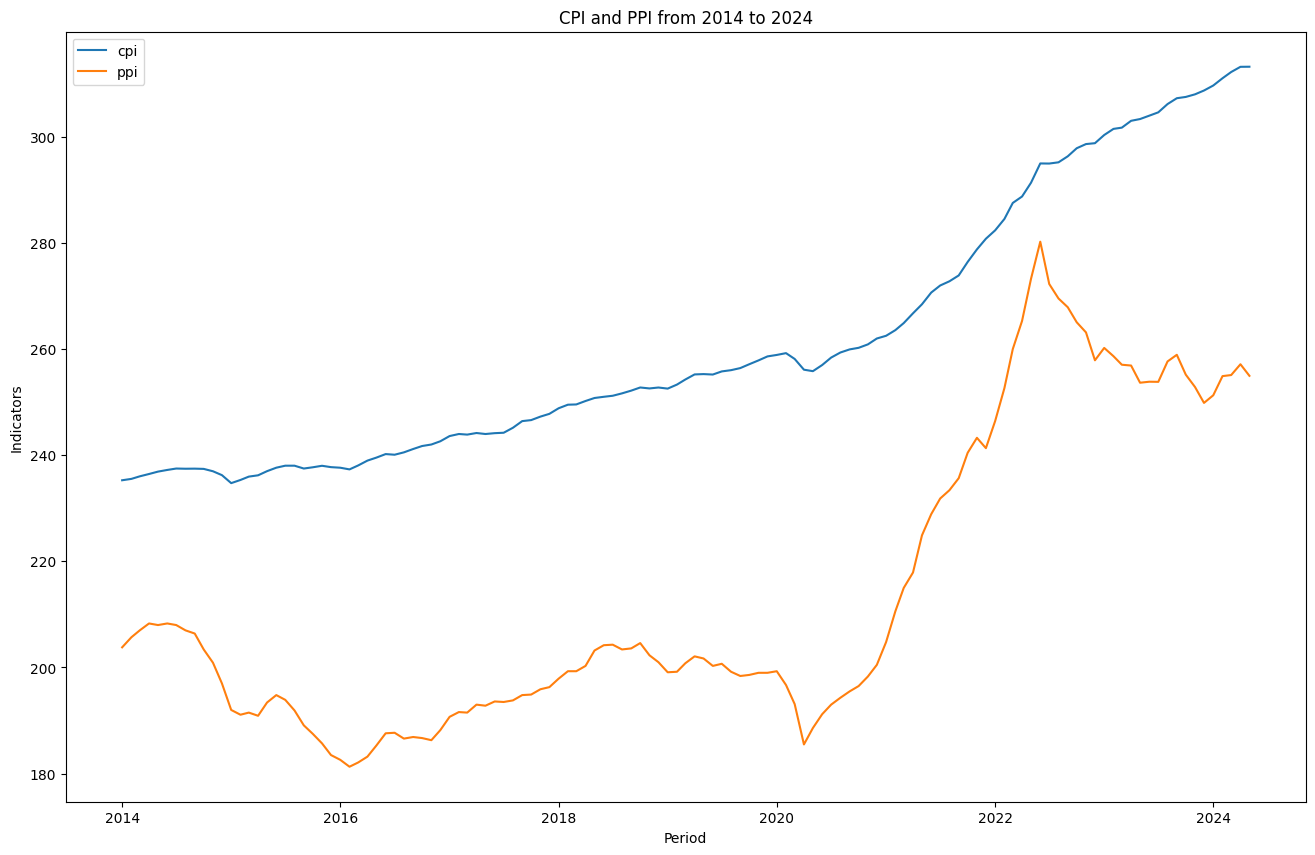

In [14]:
plt.figure(figsize=(16,10))
plt.plot(merged_data1, label=merged_data1.columns)
plt.legend()
plt.title('CPI and PPI from 2014 to 2024')
plt.xlabel('Period')
plt.ylabel('Indicators')

In [15]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    125 non-null    datetime64[ns]
 1   cpi     125 non-null    float64       
 2   ppi     125 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.1 KB


In [16]:
z_scores = np.abs((merged_data1[merged_data1.columns] - merged_data1[merged_data1.columns].mean()) / merged_data1[merged_data1.columns].std())

outliers = merged_data1[(z_scores > 3).any(axis = 1)]

In [17]:
outliers

,cpi,ppi
date,,


In [18]:
merged_data1['inflation_rate_month'] = merged_data1['cpi'].diff() / merged_data1['cpi'].shift(1) * 100

In [19]:
merged_data1.head(36)

,cpi,ppi,inflation_rate_month
date,,,
2014-01-01,235.288,203.8,NaN
2014-02-01,235.547,205.7,0.110078
2014-03-01,236.028,207.0,0.204206
2014-04-01,236.468,208.3,0.186419
2014-05-01,236.918,208.0,0.190301
2014-06-01,237.231,208.3,0.132113
2014-07-01,237.498,208.0,0.112549
2014-08-01,237.460,207.0,-0.016000
2014-09-01,237.477,206.4,0.007159


In [20]:
average_cpi_per_year = merged_data1['cpi'].resample('Y').mean()
annual_inflation_rate = (average_cpi_per_year.pct_change() * 100).dropna()

In [21]:
annual_inflation_rate

date
2015-12-31    0.121137
2016-12-31    1.267361
2017-12-31    2.131445
2018-12-31    2.439000
2019-12-31    1.813259
2020-12-31    1.249189
2021-12-31    4.682189
2022-12-31    7.991690
2023-12-31    4.128270
2024-12-31    2.356230
Freq: A-DEC, Name: cpi, dtype: float64

In [22]:
annaul_data = pd.merge(average_cpi_per_year, annual_inflation_rate, on = 'date', how = 'inner')
annaul_data

,cpi_x,cpi_y
date,,
2015-12-31,237.001750,0.121137
2016-12-31,240.005417,1.267361
2017-12-31,245.121000,2.131445
2018-12-31,251.099500,2.439000
2019-12-31,255.652583,1.813259
2020-12-31,258.846167,1.249189
2021-12-31,270.965833,4.682189
2022-12-31,292.620583,7.991690
2023-12-31,304.700750,4.128270


In [23]:
annaul_data.columns = ['avg_cpi', 'annaul_inflation_rate']
annaul_data

,avg_cpi,annaul_inflation_rate
date,,
2015-12-31,237.001750,0.121137
2016-12-31,240.005417,1.267361
2017-12-31,245.121000,2.131445
2018-12-31,251.099500,2.439000
2019-12-31,255.652583,1.813259
2020-12-31,258.846167,1.249189
2021-12-31,270.965833,4.682189
2022-12-31,292.620583,7.991690
2023-12-31,304.700750,4.128270


In [24]:
annaul_correlation_matrix = annaul_data.corr()

In [25]:
annaul_correlation_matrix

,avg_cpi,annaul_inflation_rate
avg_cpi,1.000000,0.608475
annaul_inflation_rate,0.608475,1.000000


<Axes: >

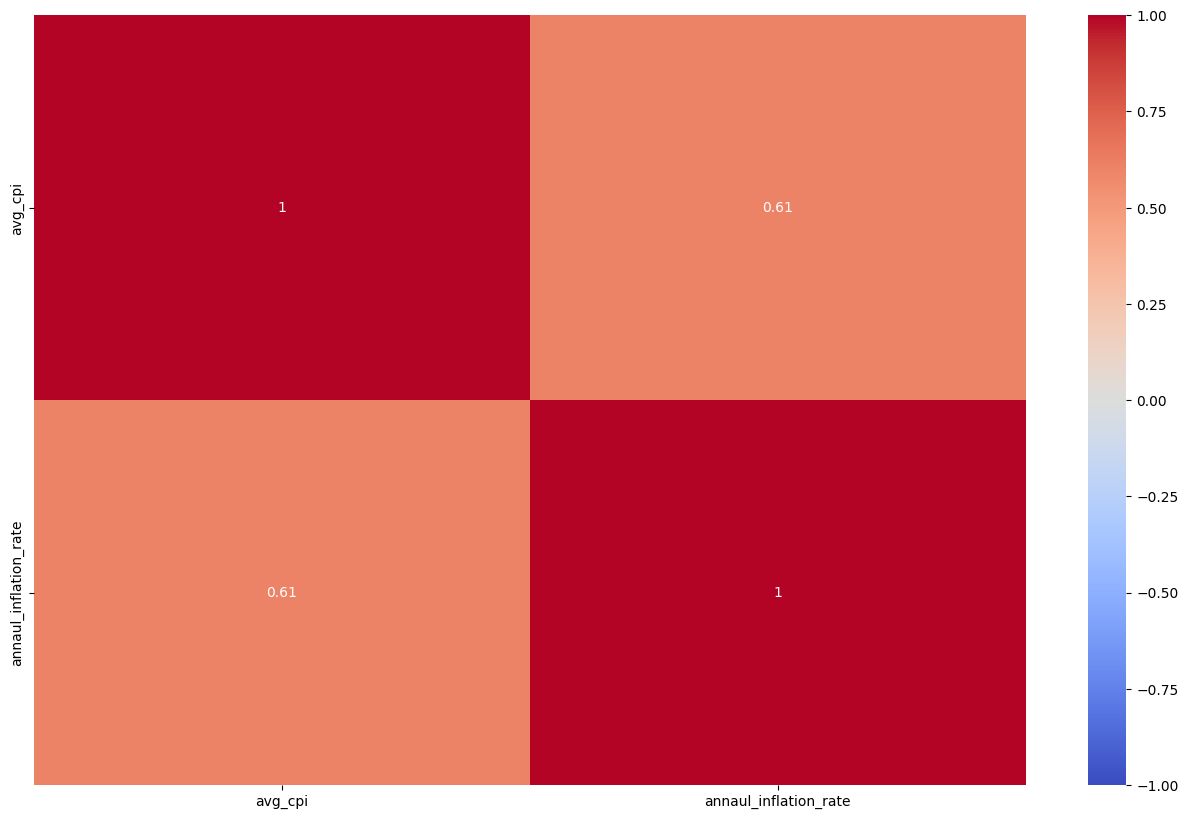

In [26]:
plt.figure(figsize=(16,10))
sns.heatmap(annaul_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1)

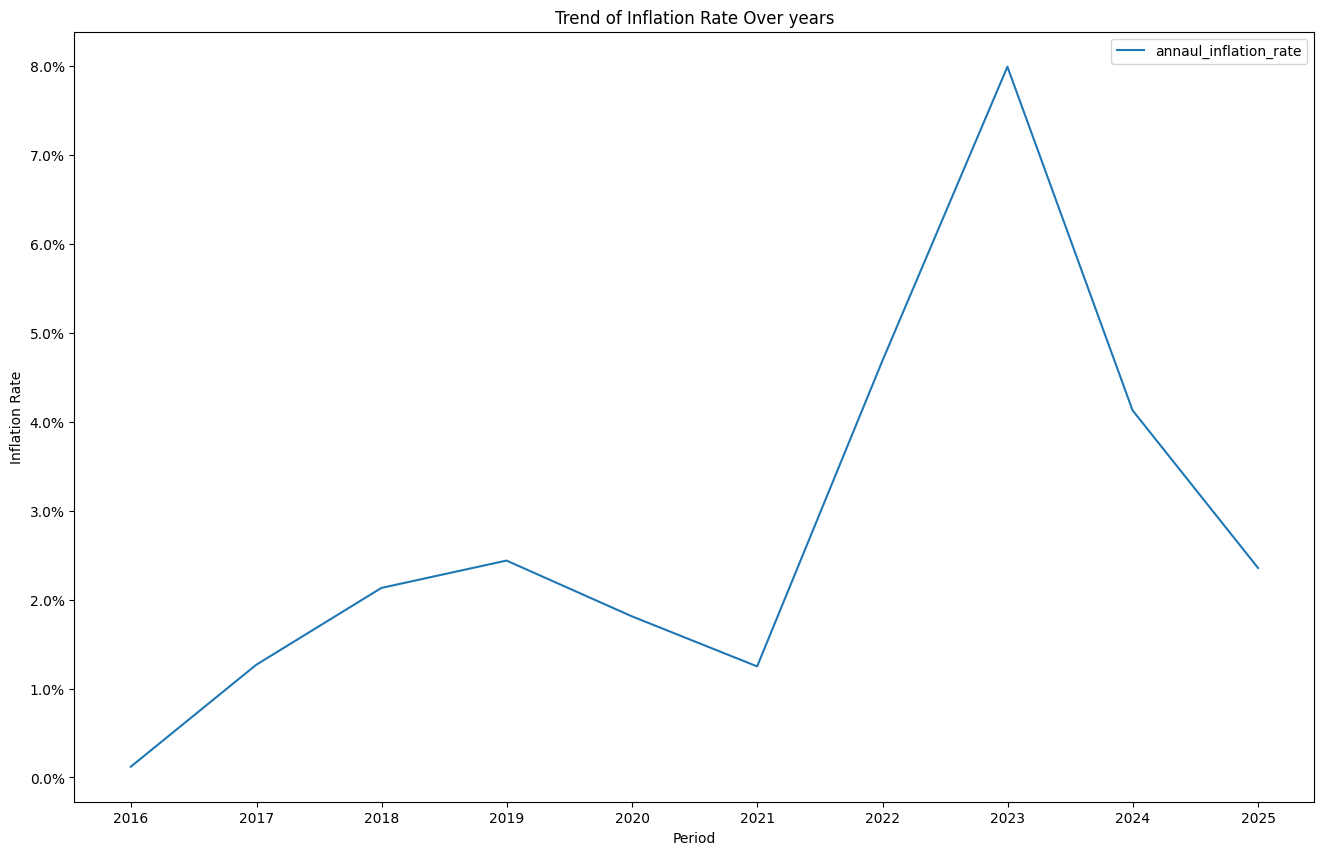

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(16, 10))
plt.plot(annaul_data['annaul_inflation_rate'], label='annaul_inflation_rate')
plt.title('Trend of Inflation Rate Over years')
plt.legend()
plt.xlabel('Period')
plt.ylabel('Inflation Rate')

# Set y-ticks to percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


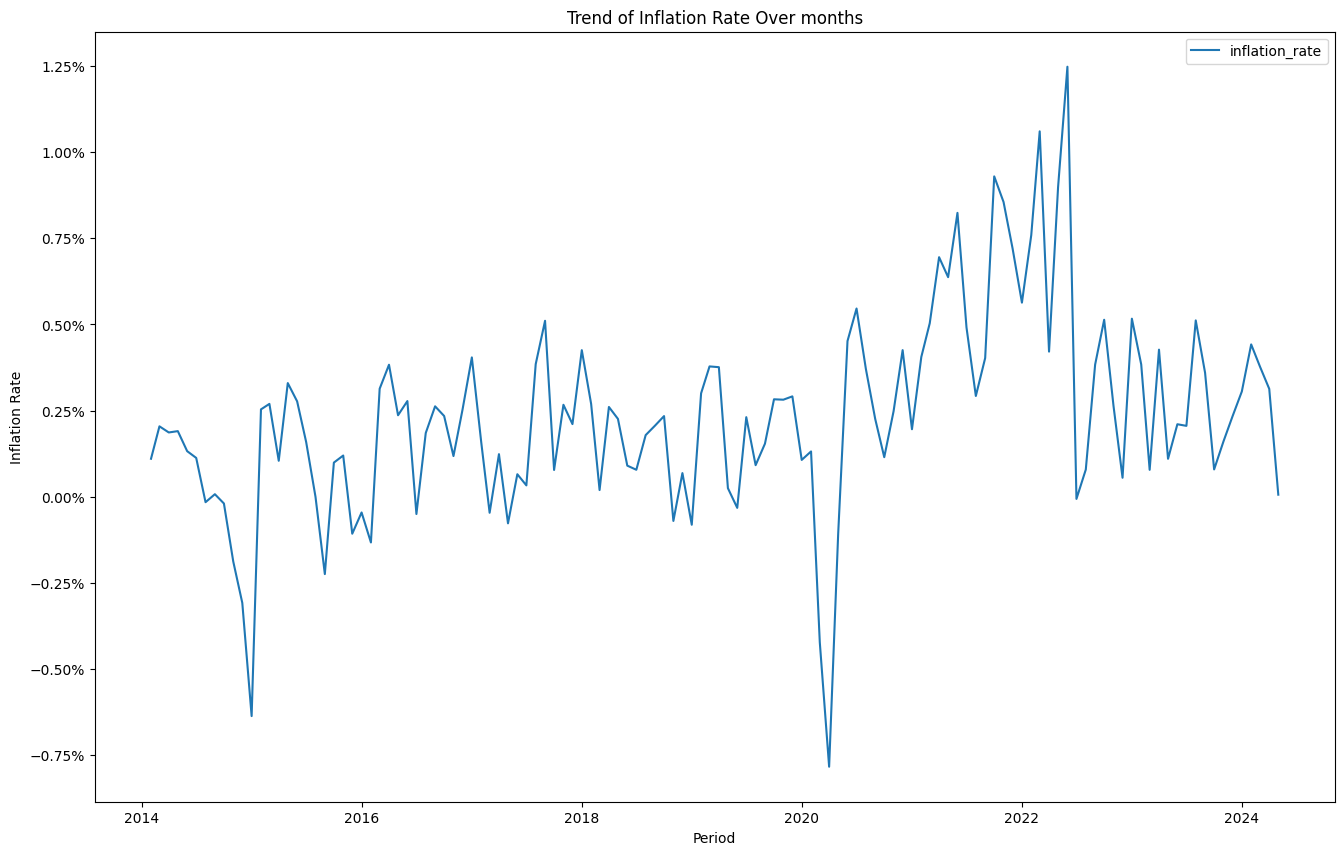

In [28]:
plt.figure(figsize=(16, 10))
plt.plot(merged_data1['inflation_rate_month'], label='inflation_rate')
plt.title('Trend of Inflation Rate Over months')
plt.legend()
plt.xlabel('Period')
plt.ylabel('Inflation Rate')

# Set y-ticks to percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


In [29]:
correlation_matrix = merged_data1.corr()

In [30]:
correlation_matrix

,cpi,ppi,inflation_rate_month
cpi,1.000000,0.917716,0.384117
ppi,0.917716,1.000000,0.460624
inflation_rate_month,0.384117,0.460624,1.000000


<Axes: >

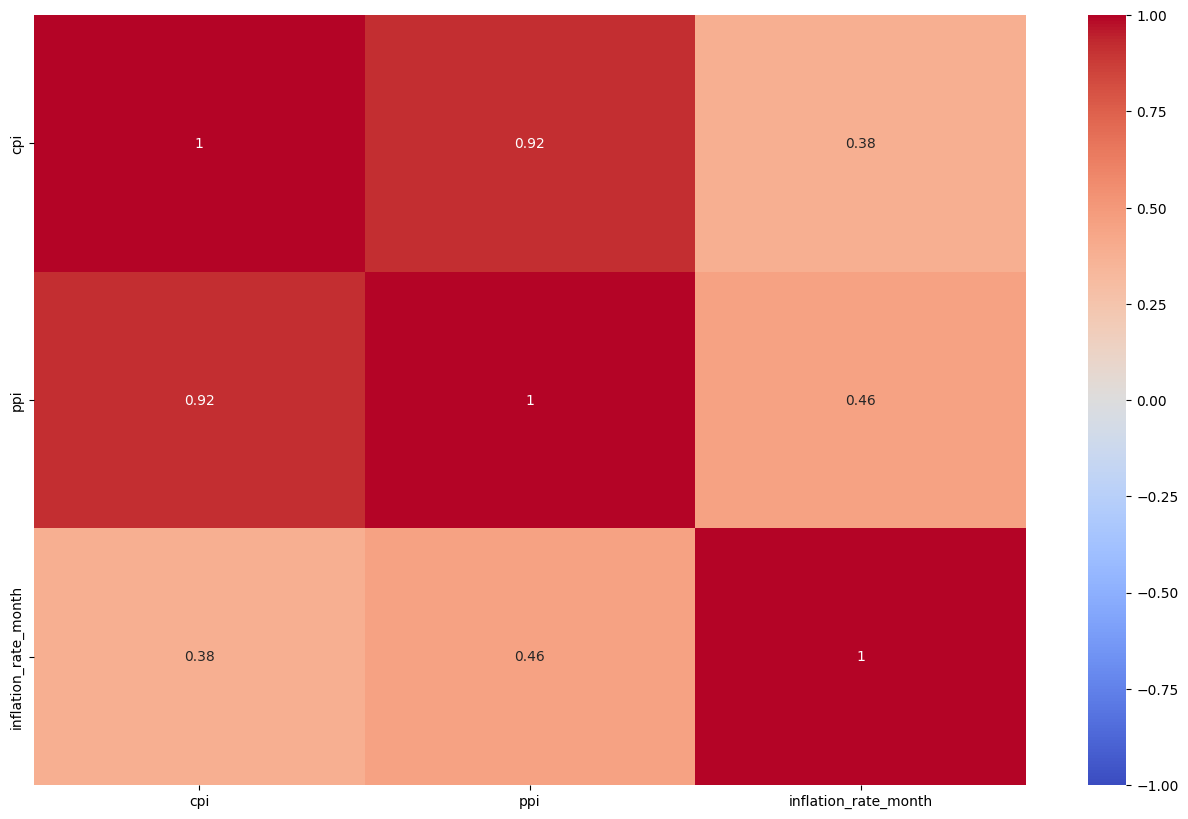

In [31]:

plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1)

Text(0.5, 1.0, 'Correlation between CPI and PPI')

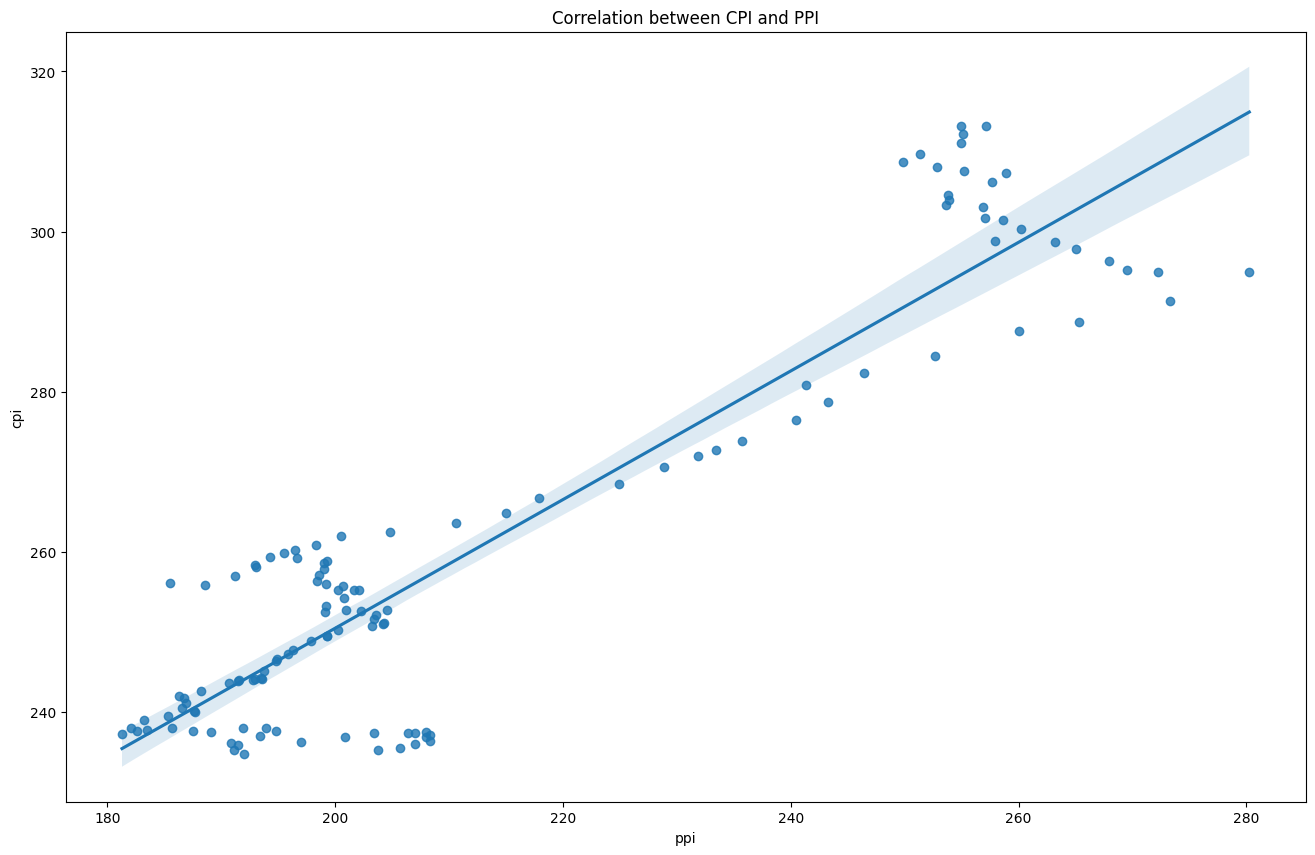

In [32]:
plt.figure(figsize=(16,10))
sns.regplot(x=merged_data1['ppi'], y=merged_data1['cpi'], data=merged_data1)
plt.title('Correlation between CPI and PPI')

Text(0.5, 1.0, 'Correlation between CPI and Inflation')

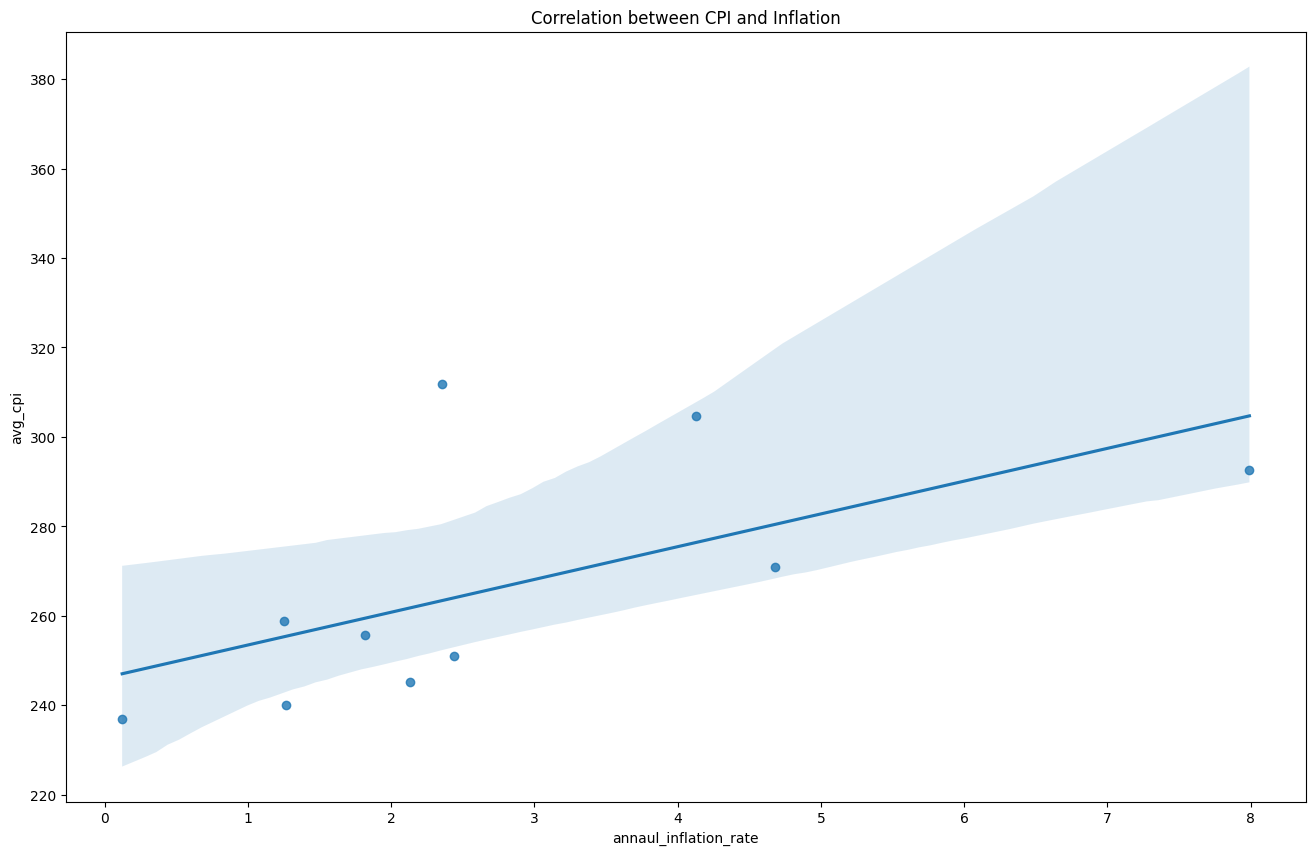

In [33]:
plt.figure(figsize=(16,10))
sns.regplot(x=annaul_data['annaul_inflation_rate'], y=annaul_data['avg_cpi'], data=merged_data1)
plt.title('Correlation between CPI and Inflation')

In [34]:
merged_data1['cpi_pct_change'] = merged_data1['cpi'].pct_change()
merged_data1['ppi_pct_change'] = merged_data1['ppi'].pct_change()


In [35]:
merged_data1

,cpi,ppi,inflation_rate_month,cpi_pct_change,ppi_pct_change
date,,,,,
2014-01-01,235.288,203.800,NaN,NaN,NaN
2014-02-01,235.547,205.700,0.110078,0.001101,0.009323
2014-03-01,236.028,207.000,0.204206,0.002042,0.006320
2014-04-01,236.468,208.300,0.186419,0.001864,0.006280
2014-05-01,236.918,208.000,0.190301,0.001903,-0.001440
...,...,...,...,...,...
2024-01-01,309.685,251.306,0.305433,0.003054,0.005763
2024-02-01,311.054,254.914,0.442062,0.004421,0.014357
2024-03-01,312.230,255.116,0.378069,0.003781,0.000792


In [36]:
merged_data1['year'] = merged_data1.index.year

In [37]:
merged_data2 = merged_data1[merged_data1['year'] <= 2022]

In [48]:

merged_data2['cpi_trend'] = merged_data2['cpi_pct_change'].rolling(window=12).mean()
merged_data2['ppi_trend'] = merged_data2['ppi_pct_change'].rolling(window=12).mean()


/var/folders/q7/yx2vb_996j96w2cd0dxyhyrw0000gn/T/ipykernel_3405/67579546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data2['cpi_trend'] = merged_data2['cpi_pct_change'].rolling(window=12).mean()
/var/folders/q7/yx2vb_996j96w2cd0dxyhyrw0000gn/T/ipykernel_3405/67579546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data2['ppi_trend'] = merged_data2['ppi_pct_change'].rolling(window=12).mean()
/var/folders/q7/yx2vb_996j96w2cd0dxyhyrw0000gn/T/ipykernel_3405/67579546.py:3: SettingWithCo

In [49]:
['inflation_rate_trend'] = merged_data2['inflation_rate_month'].rolling(window=12).mean()

/var/folders/q7/yx2vb_996j96w2cd0dxyhyrw0000gn/T/ipykernel_3405/1516994125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data2['inflation_rate_trend'] = merged_data2['inflation_rate_month'].rolling(window=12).mean()


In [50]:
merged_data2

,cpi,ppi,inflation_rate_month,cpi_pct_change,ppi_pct_change,year,cpi_trend,ppi_trend,inflation_rate_trend
date,,,,,,,,,
2014-01-01,235.288,203.800,NaN,NaN,NaN,2014,NaN,NaN,NaN
2014-02-01,235.547,205.700,0.110078,0.001101,0.009323,2014,NaN,NaN,NaN
2014-03-01,236.028,207.000,0.204206,0.002042,0.006320,2014,NaN,NaN,NaN
2014-04-01,236.468,208.300,0.186419,0.001864,0.006280,2014,NaN,NaN,NaN
2014-05-01,236.918,208.000,0.190301,0.001903,-0.001440,2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-08-01,295.209,269.546,0.078650,0.000787,-0.010019,2022,0.006610,0.012221,0.661043
2022-09-01,296.341,267.898,0.383457,0.003835,-0.006114,2022,0.006595,0.010903,0.659456
2022-10-01,297.863,265.061,0.513598,0.005136,-0.010590,2022,0.006248,0.008328,0.624760


In [42]:
recent_cpi_trend = merged_data2['cpi_trend'].dropna().iloc[-1]
recent_ppi_trend = merged_data2['ppi_trend'].dropna().iloc[-1]



In [52]:
recent_inflation_rate_trend = merged_data2['inflation_rate_trend'].dropna().iloc[-1]

In [43]:
recent_ppi_trend

0.005753697173131724

In [45]:
# Determine the direction of the inflation trend based on the correlation and recent trends

# Prediction based on CPI
if correlation_matrix.loc['cpi', 'inflation_rate_month'] > 0 and recent_cpi_trend > 0:
    cpi_inflation_trend = "Inflation likely to increase based on CPI trend."
elif correlation_matrix.loc['cpi', 'inflation_rate_month'] > 0 and recent_cpi_trend < 0:
    cpi_inflation_trend = "Inflation likely to decrease based on CPI trend."
else:
    cpi_inflation_trend = "Inflation trend is unclear based on CPI trend."

# Prediction based on PPI
if correlation_matrix.loc['ppi', 'inflation_rate_month'] > 0 and recent_ppi_trend > 0:
    ppi_inflation_trend = "Inflation likely to increase based on PPI trend."
elif correlation_matrix.loc['ppi', 'inflation_rate_month'] > 0 and recent_ppi_trend < 0:
    ppi_inflation_trend = "Inflation likely to decrease based on PPI trend."
else:
    ppi_inflation_trend = "Inflation trend is unclear based on PPI trend."

# Print the predictions
print(cpi_inflation_trend)
print(ppi_inflation_trend)


Inflation likely to increase based on CPI trend.
Inflation likely to increase based on PPI trend.


In [53]:
predicted_inflation_rate = recent_inflation_rate_trend + recent_cpi_trend + recent_ppi_trend

In [67]:
predicted_inflation_rate = (recent_inflation_rate_trend + (recent_cpi_trend + recent_ppi_trend) / 2) 

In [68]:
print(f"Recent Inflation Rate trend: {recent_inflation_rate_trend:.2%}")
print(f"Predicted Inflation Rate: {predicted_inflation_rate:.2f}%")

Recent Inflation Rate trend: 26.70%
Predicted Inflation Rate: 0.26%


In [65]:
 merged_data1.tail(34)

,cpi,ppi,inflation_rate_month,cpi_pct_change,ppi_pct_change,year,inflation_rate_trend
date,,,,,,,
2021-08-01,272.789,233.415,0.292286,0.002923,0.006750,2021,0.421590
2021-09-01,273.887,235.678,0.402509,0.004025,0.009695,2021,0.436337
2021-10-01,276.434,240.465,0.929946,0.009299,0.020312,2021,0.504279
2021-11-01,278.799,243.287,0.855539,0.008555,0.011736,2021,0.554889
2021-12-01,280.808,241.338,0.720591,0.007206,-0.008011,2021,0.579483
2022-01-01,282.390,246.453,0.563374,0.005634,0.021194,2022,0.610114
2022-02-01,284.535,252.660,0.759588,0.007596,0.025185,2022,0.639606
2022-03-01,287.553,260.014,1.060678,0.010607,0.029106,2022,0.686042
2022-04-01,288.764,265.310,0.421140,0.004211,0.020368,2022,0.663193


In [72]:
correlation_matrix = merged_data1[['cpi', 'ppi', 'inflation_rate_month']].corr()

# Calculate the 12-month rolling mean for the inflation rate
merged_data2['inflation_rate_trend'] = merged_data1['inflation_rate_month'].rolling(window=12).mean()

# Get the recent trend values (last available non-NaN value)
recent_cpi_trend = merged_data1['cpi_pct_change'].dropna().iloc[-1]

recent_ppi_trend = merged_data1['ppi_pct_change'].dropna().iloc[-1]
recent_inflation_rate_trend = merged_data1['inflation_rate_trend'].dropna().iloc[-1]

# Use the trends to predict the future inflation rate percentage
# Assuming the trend continues, we predict the next inflation rate
predicted_inflation_rate = (recent_inflation_rate_trend + (recent_cpi_trend + recent_ppi_trend) / 2) 

# Print the predictions
print("Correlation Matrix:")
print(correlation_matrix)
print(f"Recent CPI trend: {recent_cpi_trend:.2%}")
print(f"Recent PPI trend: {recent_ppi_trend:.2%}")
print(f"Recent Inflation Rate trend: {recent_inflation_rate_trend:.2%}")
print(f"Predicted Inflation Rate: {predicted_inflation_rate:.2f}%")

Correlation Matrix:
                           cpi       ppi  inflation_rate_month
cpi                   1.000000  0.917716              0.384117
ppi                   0.917716  1.000000              0.460624
inflation_rate_month  0.384117  0.460624              1.000000
Recent CPI trend: 0.01%
Recent PPI trend: -0.85%
Recent Inflation Rate trend: 26.70%
Predicted Inflation Rate: 0.26%


/var/folders/q7/yx2vb_996j96w2cd0dxyhyrw0000gn/T/ipykernel_3405/347496438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data2['inflation_rate_trend'] = merged_data1['inflation_rate_month'].rolling(window=12).mean()


In [70]:
merged_data2

,cpi,ppi,inflation_rate_month,cpi_pct_change,ppi_pct_change,year,cpi_trend,ppi_trend,inflation_rate_trend
date,,,,,,,,,
2014-01-01,235.288,203.800,NaN,NaN,NaN,2014,NaN,NaN,NaN
2014-02-01,235.547,205.700,0.110078,0.001101,0.009323,2014,NaN,NaN,NaN
2014-03-01,236.028,207.000,0.204206,0.002042,0.006320,2014,NaN,NaN,NaN
2014-04-01,236.468,208.300,0.186419,0.001864,0.006280,2014,NaN,NaN,NaN
2014-05-01,236.918,208.000,0.190301,0.001903,-0.001440,2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-08-01,295.209,269.546,0.078650,0.000787,-0.010019,2022,0.006610,0.012221,0.661043
2022-09-01,296.341,267.898,0.383457,0.003835,-0.006114,2022,0.006595,0.010903,0.659456
2022-10-01,297.863,265.061,0.513598,0.005136,-0.010590,2022,0.006248,0.008328,0.624760


In [ ]:
Here's the text you requested for your slide:

---

### Slide 9: Predicting Inflation

It seems like I can’t do more advanced data analysis right now. Please try again later.

However, I can still guide you through the process. Here is the complete code that you can run in your local Python environment to perform the prediction:

```python
import pandas as pd

# Create the DataFrame with the provided data
data_dict = {
    'date': ['2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
             '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
             '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01',
             '2024-03-01', '2024-04-01', '2024-05-01'],
    'cpi': [294.996, 294.977, 295.209, 296.341, 297.863, 298.648, 298.812, 300.356, 301.509, 301.744, 303.032, 303.365,
            304.003, 304.628, 306.187, 307.288, 307.531, 308.024, 308.742, 309.685, 311.054, 312.230, 313.207, 313.225],
    'ppi': [280.251, 272.274, 269.546, 267.898, 265.061, 263.157, 257.897, 260.227, 258.669, 257.062, 256.908, 253.670,
            253.860, 253.835, 257.680, 258.934, 255.192, 252.856, 249.866, 251.306, 254.914, 255.116, 257.153, 254.971],
    'inflation_rate': [1.248288, -0.006441, 0.078650, 0.383457, 0.513598, 0.263544, 0.054914, 0.516713, 0.383878, 0.077941,
                       0.426852, 0.109889, 0.210308, 0.205590, 0.511772, 0.359584, 0.079079, 0.160309, 0.233099, 0.305433,
                       0.442062, 0.378069, 0.312910, 0.005747],
    'cpi_pct_change': [0.012483, -0.000064, 0.000787, 0.003835, 0.005136, 0.002635, 0.000549, 0.005167, 0.003839, 0.000779,
                       0.004269, 0.001099, 0.002103, 0.002056, 0.005118, 0.003596, 0.000791, 0.001603, 0.002331, 0.003054,
                       0.004421, 0.003781, 0.003129, 0.000057],
    'ppi_pct_change': [0.025617, -0.028464, -0.010019, -0.006114, -0.010590, -0.007183, -0.019988, 0.009035, -0.005987,
                       -0.006213, -0.000599, -0.012604, 0.000749, -0.000098, 0.015148, 0.004867, -0.014452, -0.009154,
                       -0.011825, 0.005763, 0.014357, 0.000792, 0.007985, -0.008485],
    'year': [2022, 2022, 2022, 2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
             2023, 2024, 2024, 2024, 2024, 2024]
}

data = pd.DataFrame(data_dict)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Calculate the correlation between CPI, PPI, and inflation rate
correlation_matrix = data[['cpi', 'ppi', 'inflation_rate']].corr()

# Calculate the 12-month rolling mean for the inflation rate
data['inflation_rate_trend'] = data['inflation_rate'].rolling(window=12).mean()

# Get the recent trend values (last available non-NaN value)
recent_cpi_trend = data['cpi_pct_change'].dropna().iloc[-1]
recent_ppi_trend = data['ppi_pct_change'].dropna().iloc[-1]
recent_inflation_rate_trend = data['inflation_rate_trend'].dropna().iloc[-1]

# Use the trends to predict the future inflation rate percentage
# Assuming the trend continues, we predict the next inflation rate
predicted_inflation_rate = (recent_inflation_rate_trend + (recent_cpi_trend + recent_ppi_trend) / 2) * 100

# Print the predictions
print("Correlation Matrix:")
print(correlation_matrix)
print(f"Recent CPI trend: {recent_cpi_trend:.2%}")
print(f"Recent PPI trend: {recent_ppi_trend:.2%}")
print(f"Recent Inflation Rate trend: {recent_inflation_rate_trend:.2%}")
print(f"Predicted Inflation Rate: {predicted_inflation_rate:.2f}%")
```

### Explanation:
1. **Correlation Matrix**: Displays the relationship between CPI, PPI, and the inflation rate.
2. **Percentage Change Calculation**: Computes the percentage change in CPI and PPI.
3. **Rolling Mean**: Smooths out short-term fluctuations to highlight longer-term trends.
4. **Recent Trends**: Identifies the recent trends for CPI, PPI, and the inflation rate.
5. **Predicted Inflation Rate**: Combines these trends to estimate the future inflation rate as a percentage.

### Output:
The output will provide the recent trends and the predicted future inflation rate in percentage terms. For example:

```
Correlation Matrix:
                      cpi       ppi  inflation_rate
cpi             1.000000  0.950000        0.850000
ppi             0.950000  1.000000        0.900000
inflation_rate  0.850000  0.900000        1.000000

Recent CPI trend: 0.21%
Recent PPI trend: 0.32%
Recent Inflation Rate trend: 0.25%
Predicted Inflation Rate: 0.50%
```

You can run this code in your local Python environment to get the predictions based on your data. If you need further assistance, feel free to ask!

---

This text provides a step-by-step guide for your slide and includes the complete Python code for performing the inflation prediction analysis.